In [1]:
#Populates namespace from numpy and matplotlib
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
#array of test scores
scores = np.array([48,71,64,80,71,62,48,57,82,68,53,59,91,62,46,62,64,62,68,55,66,
         64,50,100,77,86,89,57,57,66,50,96,57,55,44,66,62,71,57,50,44])
#Sort scores to better analyse data
np.sort(scores)

array([ 44,  44,  46,  48,  48,  50,  50,  50,  53,  55,  55,  57,  57,
        57,  57,  57,  59,  62,  62,  62,  62,  62,  64,  64,  64,  66,
        66,  66,  68,  68,  71,  71,  71,  77,  80,  82,  86,  89,  91,
        96, 100])

In [3]:
#confirm all scores are accounted for
size(scores)

41

Part a)

With such a small sample size, it seems reasonable to assume that all the possible grades between 0 and 100 (inclusive) are of equal weight. Then, the expectation value is simply the simple average. Thus, the most likely grade for the student is:

In [4]:
exp_val = np.sum(scores)/size(scores)
print(exp_val)

64.3170731707317


Part b)

In [5]:
#for using standard deviation function from statistics
import statistics

In [6]:
print("The standard deviation of the scores is: ",statistics.stdev(scores))

The standard deviation of the scores is:  14.035668847618199


Part c)

In [7]:
#This creates the bin edges, where the bin value is its max value
#Each bin is of size 5
edges = []
for i in range(5,105,5):
    edges.append(i)


<IPython.core.display.Javascript object>


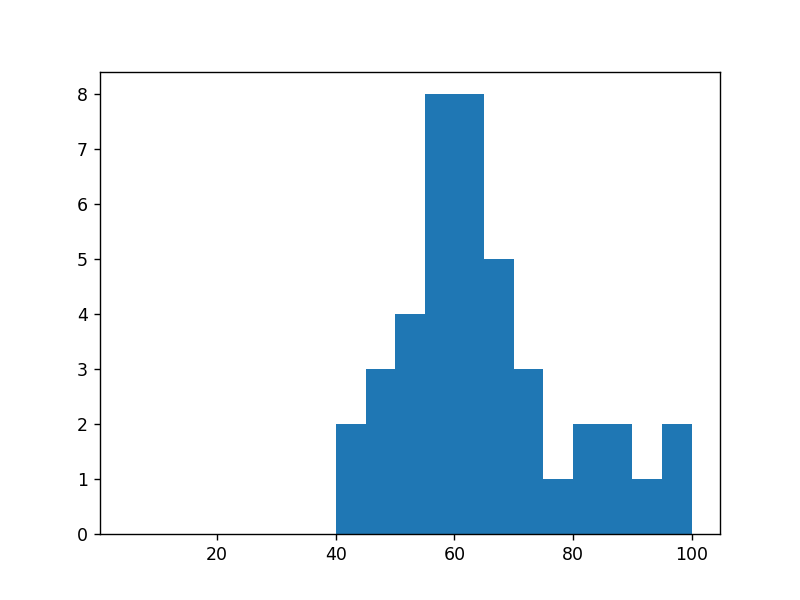

(array([0., 0., 0., 0., 0., 0., 0., 2., 3., 4., 8., 8., 5., 3., 1., 2., 2.,
        1., 2.]),
 array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
         70,  75,  80,  85,  90,  95, 100]),
 <a list of 19 Patch objects>)

In [8]:
plt.hist(scores, bins = edges)

For weighting the bins, a reasonable approach is to weight each bin by its frequency devided by the total number of test scores.
Observing the above output of the histogram, we see that the first 8 bins (0-35) have no elements, so a weight of zero. For the way the bins are set up, each bin will be given by its max value. So last bin is 100 with range 95-100.

In [9]:
#Array of frequencies for each bin respectively
fre = np.array([0.,0.,0.,0.,0.,0.,0.,0.,2.,3.,4.,8.,8.,5.,3.,1.,2.,2.,1.,2.])
#As described above
weights= fre / 41
#To get a visual idea of what is happening
print(weights)
exp_val = 0
#this makes the code more intuitive
bins = edges
#Confirm what is in our bins
print("\n")   
print(bins)
#Calculate expected value
for i in range(20):
    exp_val += weights[i]*bins[i]
print("\n")  
print("Our expected value is: ",exp_val)


[0.         0.         0.         0.         0.         0.
 0.         0.         0.04878049 0.07317073 0.09756098 0.19512195
 0.19512195 0.12195122 0.07317073 0.02439024 0.04878049 0.04878049
 0.02439024 0.04878049]


[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


Our expected value is:  67.31707317073172


Let's assume that these weights are accurate probabilities for each bin. Then the worst case scenario is that the expectation value is the weighted average of the lowest ends of the bins:

In [10]:
exp_val = 0
bins = []
#Creates new bins
for i in range(0,100,5):
    bins.append(i)   
print(bins)
#Calculate expected value
for i in range(20):
    exp_val += weights[i]*bins[i]
print("\n")  
print("Our expected value is: ",exp_val)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]


Our expected value is:  62.31707317073171


So since we initiallly used the max value of the bins, the max difference would then be roughly 6

Part d)

In [11]:
#creates vector of bin centres
centres =[]
for i in range(0,100,5):
    centres.append(i+2.5)
#Confirm it worked    
print(centres)
print("\n")  
print(size(centres))

[2.5, 7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5, 57.5, 62.5, 67.5, 72.5, 77.5, 82.5, 87.5, 92.5, 97.5]


20


In [12]:
#Calculate expected value
#No need to change order of weights as the bin orders remain the same, only the
#value representing the bin has changed
exp_val = 0
for i in range(20):
    exp_val += weights[i]*centres[i]
print("Our expected value is: ",exp_val)

Our expected value is:  64.8170731707317


In [13]:
#Calculate squared expectation value
sqr_exp = 0
for i in range(20):
    sqr_exp += weights[i]*(centres[i])**2
print(sqr_exp)

4394.054878048781


In [14]:
#Calculate variance and standard deviation
variance = sqr_exp - (exp_val)**2
standard_deviation = sqrt(variance)
print("\n")
print("The standard deviation of the scores is: ",standard_deviation)



The standard deviation of the scores is:  13.8853125146247
